# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Ahmed Elshihy

ID: 

Tutorial: 

---

Name: 

ID: 

Tutorial: 

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/telecom_churn.csv')

df.head()

/var/folders/sj/ppw5_y297zxdxx3rld00mjfh0000gn/T/ipykernel_42795/4267375949.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [3]:
df.isnull().sum()

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64

*there are missing values in customerID and Total charges*

In [4]:
df.describe()

,SeniorCitizen,tenure
count,7032.000000,7032.000000
mean,0.162400,32.421786
std,0.368844,24.545260
min,0.000000,1.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [5]:
df.shape

(7032, 21)

In [6]:
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7022,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),$69.5/m,$2625.25,No
7023,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),$102.95/m,NaN,Yes
7024,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),$78.7/m,$1495.1,No
7025,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,$60.65/m,$743.3,No
7026,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),$21.15/m,NaN,No
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,$84.8/m,$1990.5,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),$103.2/m,$7362.9,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.6/m,$346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,$74.4/m,$306.6,Yes
7031,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),$105.65/m,$6844.5,No


In [7]:
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transf

In [8]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

customerID: Number of unique values 6976
gender: Number of unique values 2
SeniorCitizen: Number of unique values 2
Partner: Number of unique values 2
Dependents: Number of unique values 2
tenure: Number of unique values 72
PhoneService: Number of unique values 2
MultipleLines: Number of unique values 3
InternetService: Number of unique values 3
OnlineSecurity: Number of unique values 3
OnlineBackup: Number of unique values 3
DeviceProtection: Number of unique values 3
TechSupport: Number of unique values 3
StreamingTV: Number of unique values 3
StreamingMovies: Number of unique values 3
Contract: Number of unique values 3
PaperlessBilling: Number of unique values 2
PaymentMethod: Number of unique values 4
MonthlyCharges: Number of unique values 1584
TotalCharges: Number of unique values 5783
Churn: Number of unique values 2


## Data Cleaning

In [9]:
# handle null values
# CustomerID has 56 missing values however they are not significant to us
# Total charges has 852, we can handle them by multiplying tenure*monthly charges 
# change numbers to int instead of objects (monthly charges, total charges)

In [10]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype(str)

df['MonthlyCharges'] = df['MonthlyCharges'].str.extract(r'(\d+)')

df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)

In [11]:
df['TotalCharges'] = df['TotalCharges'].astype(str)

df['TotalCharges'] = df['TotalCharges'].str.extract(r'(\d+)')

df['TotalCharges'] = df['TotalCharges'].astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6976 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [13]:
df = df.drop('customerID', axis=1)

In [14]:
def fill_total_charges(row):
    if pd.isnull(row['TotalCharges']):
        return row['MonthlyCharges'] * row['tenure']
    else:
        return row['MonthlyCharges']

df['TotalCharges'] = df.apply(fill_total_charges, axis=1)

In [15]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

In [20]:
categorical_features = categorical_col.copy()
categorical_features.remove('Churn')

In [21]:
df = pd.get_dummies(df, columns=['Churn'], drop_first=True)

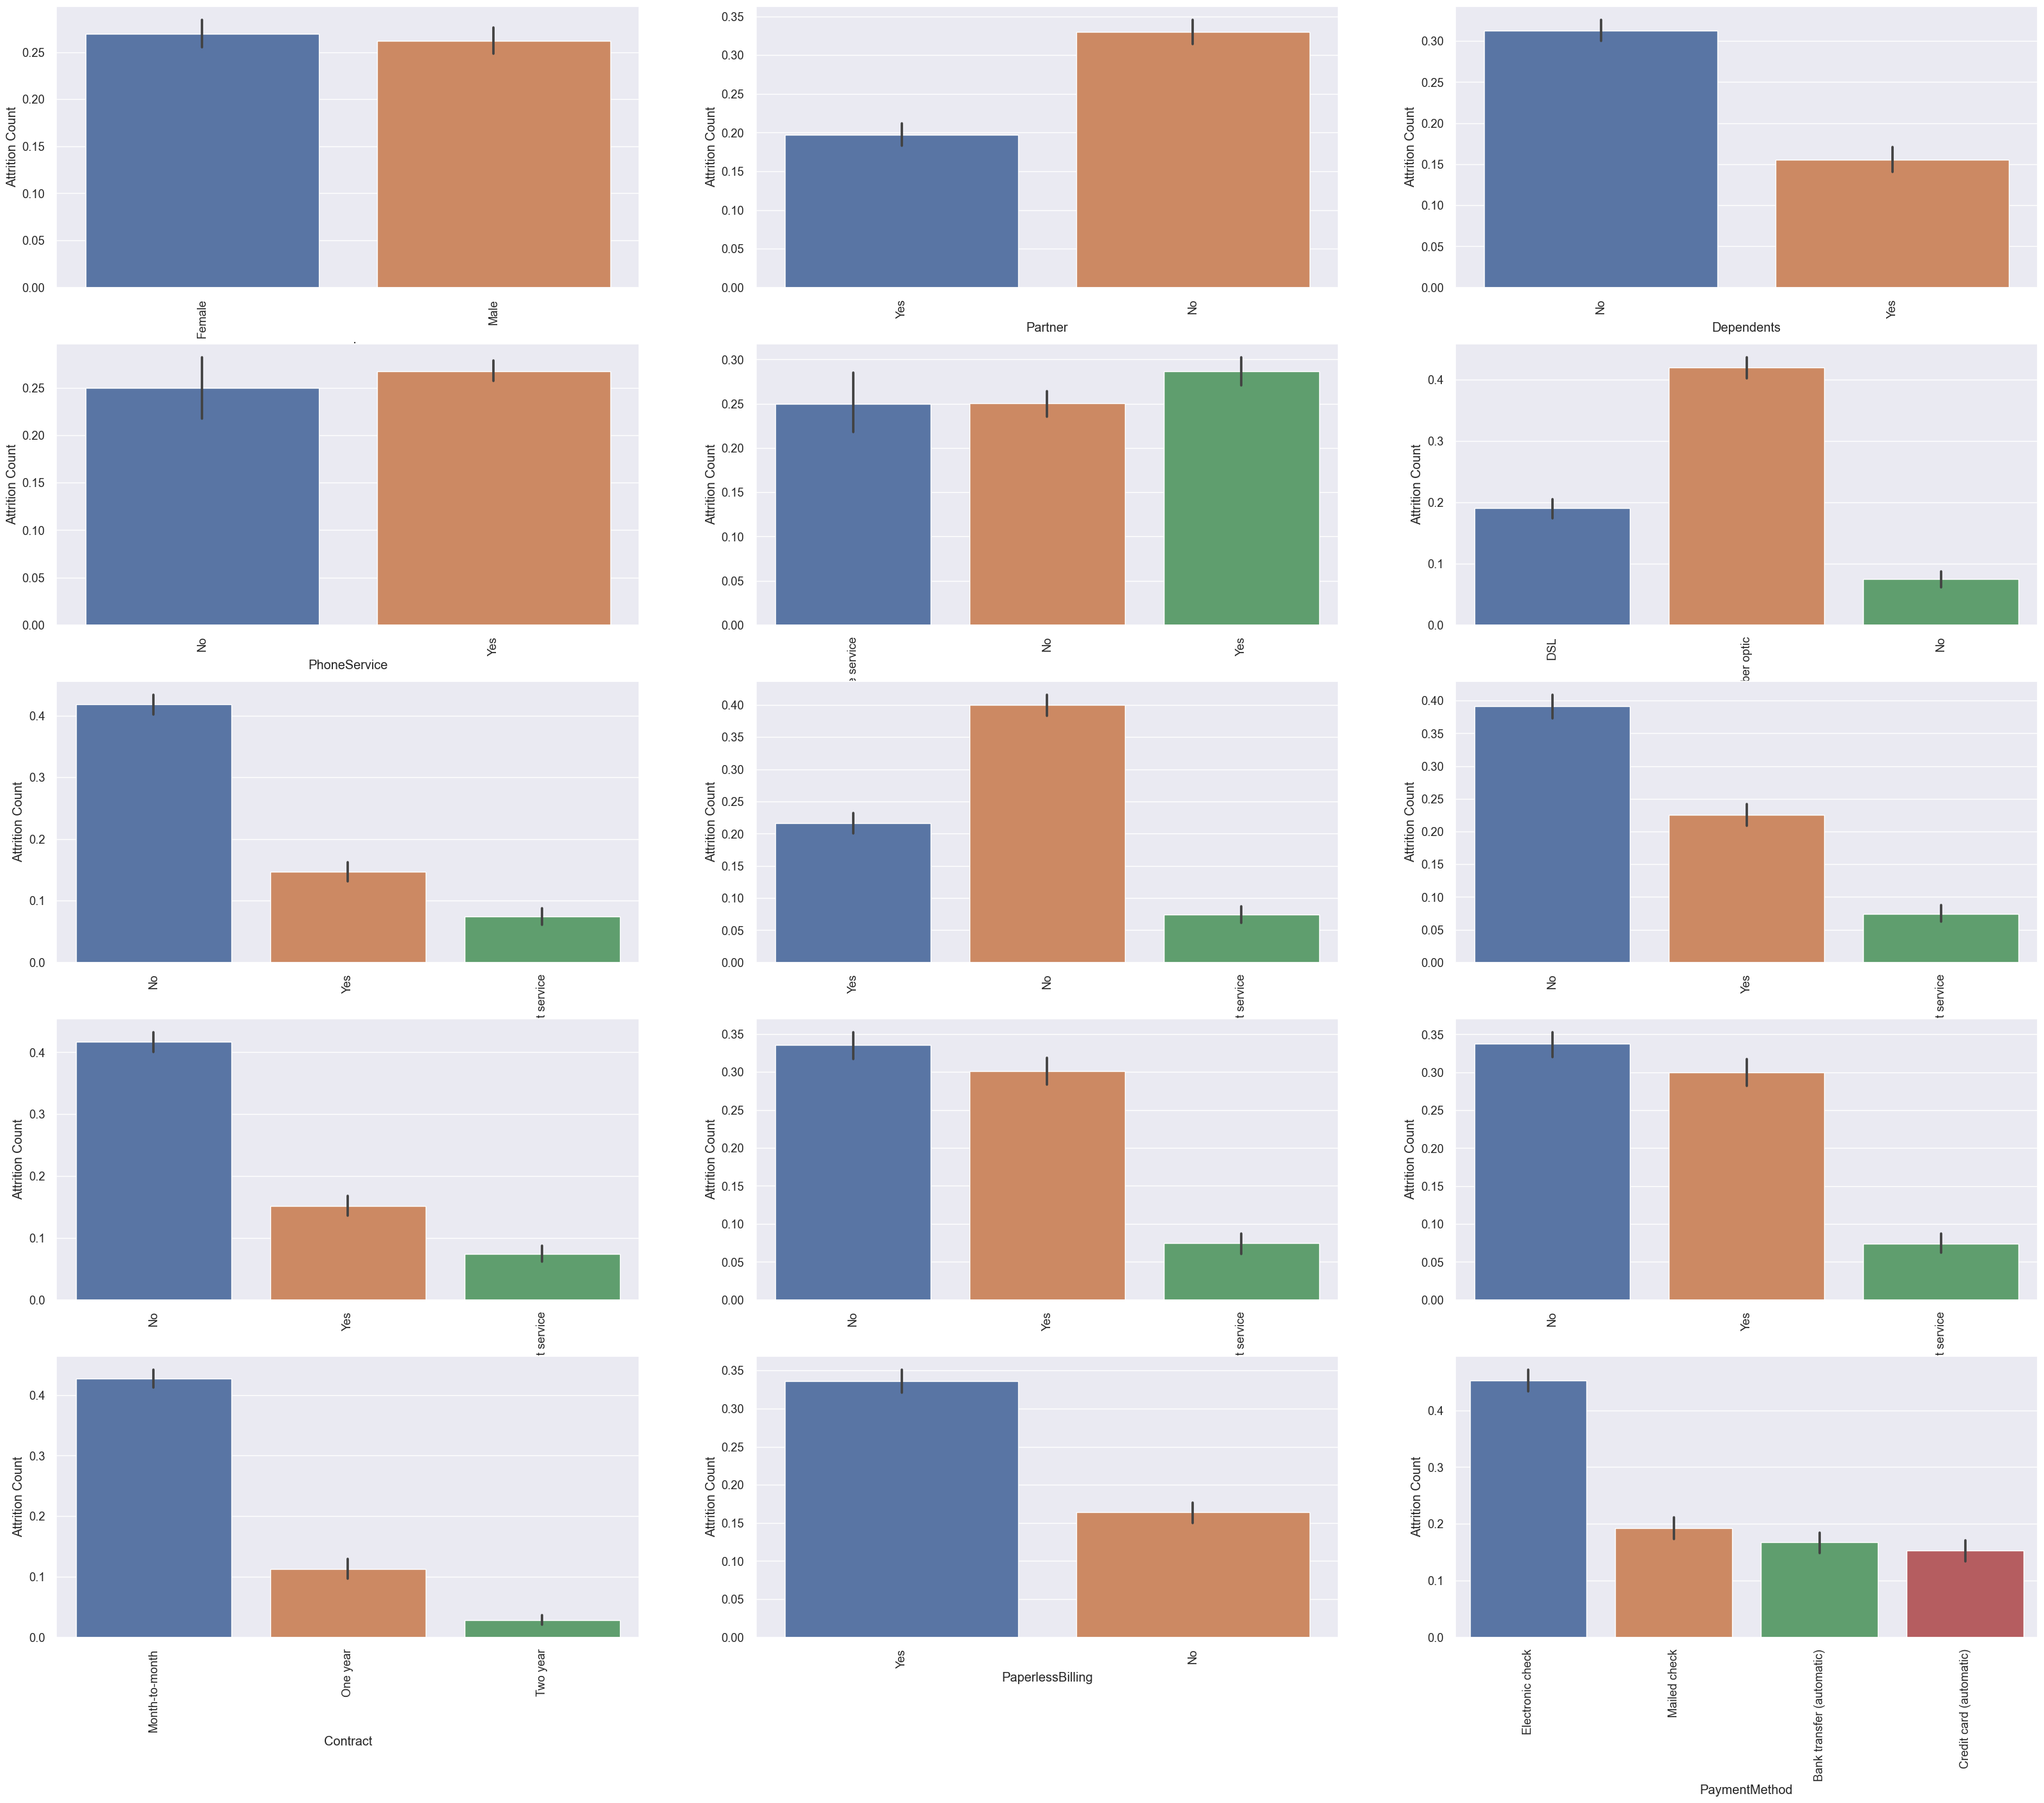

In [24]:
sns.set(font_scale=1.2)
plt.figure(figsize=(40, 40))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(6, 3, i)
    g = sns.barplot(x=column, y='Churn_Yes', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')
#should tenure be discretizatized? 

**Answer for Q1**: Your answer here

**Q2: Which payment method has the highest churn rate?**

**Visualization**

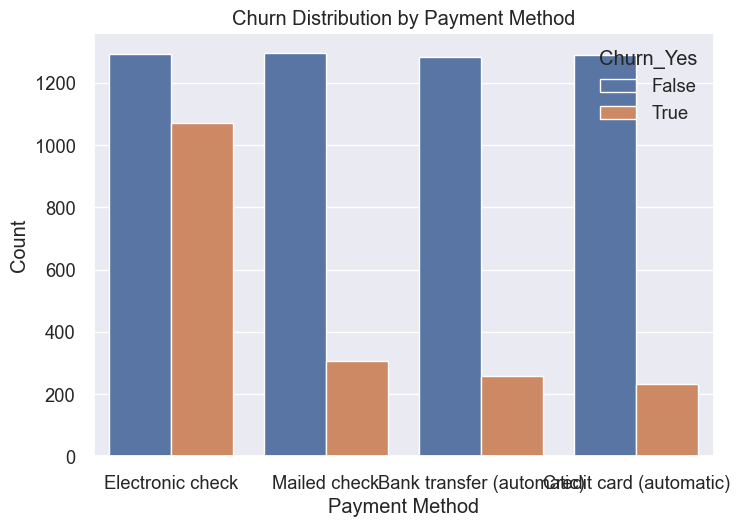

In [25]:
sns.countplot(x='PaymentMethod', hue='Churn_Yes', data=df)

plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Churn Distribution by Payment Method')
plt.show()

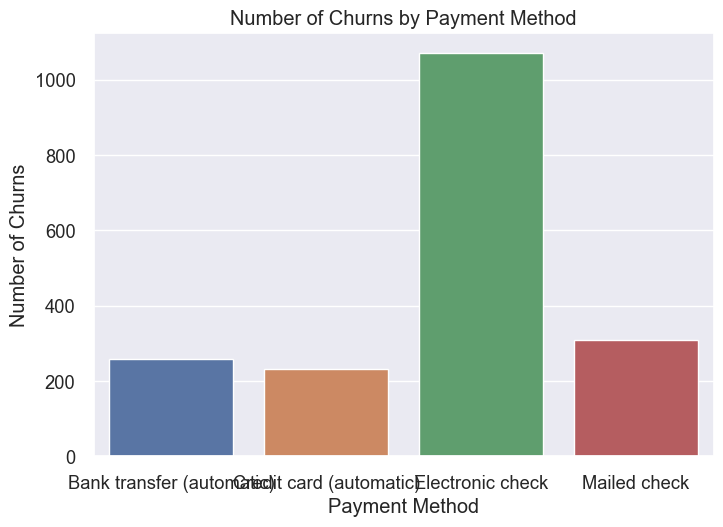

The payment method with the highest number of churns is 'Electronic check' with 1071 churns.


In [109]:
churn_by_payment = pd.crosstab(df['PaymentMethod'], df['Churn_Yes'])

sns.barplot(x=churn_by_payment.index, y=churn_by_payment[1])  # 1 = churn yes

plt.xlabel('Payment Method')
plt.ylabel('Number of Churns')
plt.title('Number of Churns by Payment Method')

plt.show()

# Find the payment method with the highest number of churns
highest_churn_payment_method = churn_by_payment[1].idxmax()
highest_churn_count = churn_by_payment[1].max()

print(f"The payment method with the highest number of churns is '{highest_churn_payment_method}' with {highest_churn_count} churns.")


**Answer for Q2**: Electronic Check

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

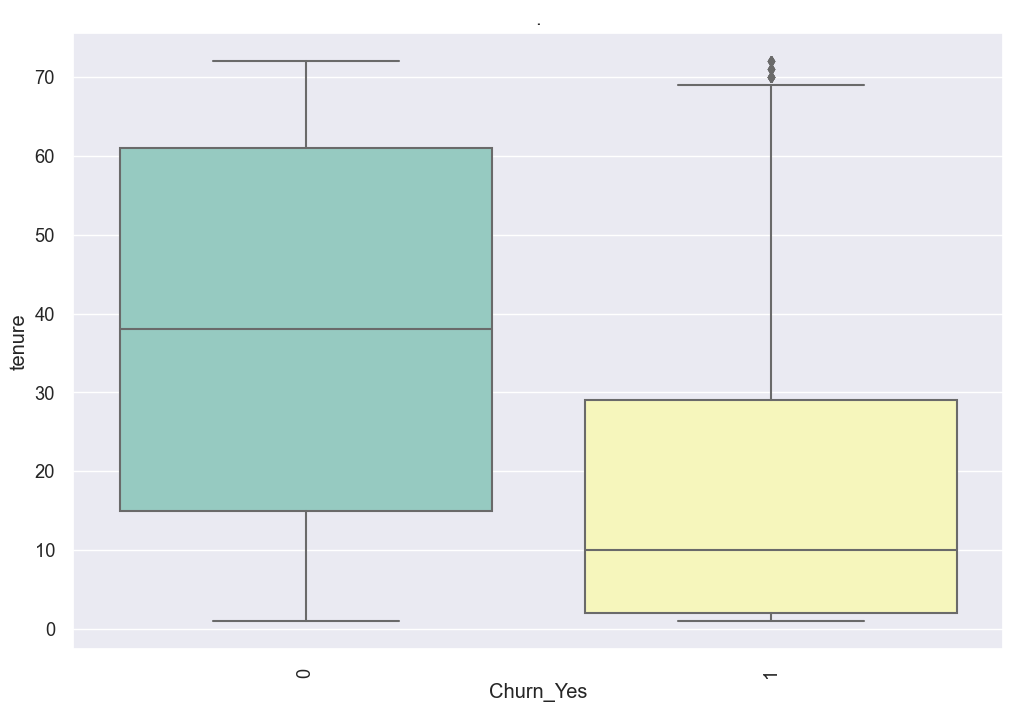

In [111]:
plt.figure(figsize=(12, 8))  # Optional: Set the figure size

# Create a box plot to visualize the distribution of selling prices by car make
sns.boxplot(x="Churn_Yes", y="tenure", data=df, palette="Set3")

plt.xlabel("Churn_Yes")
plt.ylabel("tenure")
plt.title(".")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()


**Answer for Q3**: Your answer here

## Data Preparation for Modelling

In [112]:
#encoding and drop unnessecary columns and normalizaton
#1 drop unnessecary columns: what are the variables that wont affect churn/not correlated ?
#hot encode all non-numeric and label contract  
#normalize numeric 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7032 non-null   object
 1   SeniorCitizen     7032 non-null   int64 
 2   Partner           7032 non-null   object
 3   Dependents        7032 non-null   object
 4   tenure            7032 non-null   int64 
 5   PhoneService      7032 non-null   object
 6   MultipleLines     7032 non-null   object
 7   InternetService   7032 non-null   object
 8   OnlineSecurity    7032 non-null   object
 9   OnlineBackup      7032 non-null   object
 10  DeviceProtection  7032 non-null   object
 11  TechSupport       7032 non-null   object
 12  StreamingTV       7032 non-null   object
 13  StreamingMovies   7032 non-null   object
 14  Contract          7032 non-null   object
 15  PaperlessBilling  7032 non-null   object
 16  PaymentMethod     7032 non-null   object
 17  MonthlyCharges

In [119]:
df = df.drop('gender', axis=1)
df = df.drop('PhoneService', axis=1)
df = df.drop('MultipleLines', axis=1)

#These columns were dropped as after observing the correlations above

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SeniorCitizen     7032 non-null   int64 
 1   Partner           7032 non-null   object
 2   Dependents        7032 non-null   object
 3   tenure            7032 non-null   int64 
 4   InternetService   7032 non-null   object
 5   OnlineSecurity    7032 non-null   object
 6   OnlineBackup      7032 non-null   object
 7   DeviceProtection  7032 non-null   object
 8   TechSupport       7032 non-null   object
 9   StreamingTV       7032 non-null   object
 10  StreamingMovies   7032 non-null   object
 11  Contract          7032 non-null   object
 12  PaperlessBilling  7032 non-null   object
 13  PaymentMethod     7032 non-null   object
 14  MonthlyCharges    7032 non-null   int64 
 15  TotalCharges      7032 non-null   int64 
 16  Churn_Yes         7032 non-null   int64 
dtypes: int64(5), o

In [122]:
columns_to_encode = ['Partner', 'Dependents', 'InternetService','InternetService','OnlineSecurity',
                    'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                    'PaperlessBilling','PaymentMethod']

# Apply one-hot encoding to each selected column
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

In [124]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# label encode 'year' feature
year_le = LabelEncoder()
df_encoded['Contract'] = year_le.fit_transform(df['Contract'])


In [125]:
from sklearn.preprocessing import StandardScaler

numeric_columns_to_normalize = ['SeniorCitizen', 'tenure', 'MonthlyCharges','TotalCharges']

scaler = StandardScaler()

df[numeric_columns_to_normalize] = scaler.fit_transform(df[numeric_columns_to_normalize])

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   float64
 1   tenure                                 7032 non-null   float64
 2   Contract                               7032 non-null   object 
 3   MonthlyCharges                         7032 non-null   float64
 4   TotalCharges                           7032 non-null   float64
 5   Churn_Yes                              7032 non-null   int64  
 6   Partner_Yes                            7032 non-null   bool   
 7   Dependents_Yes                         7032 non-null   bool   
 8   InternetService_Fiber optic            7032 non-null   bool   
 9   InternetService_No                     7032 non-null   bool   
 10  InternetService_Fiber optic            7032 non-null   bool   
 11  Inte

## Modelling

In [128]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [129]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Tree Visualization

In [136]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph
# alternatively, to export:
# graph.render('attrition')

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

## Evaluation

In [133]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [134]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.48%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.983602     0.988124  0.984762     0.985863      0.984804
recall        0.995849     0.954128  0.984762     0.974989      0.984762
f1-score      0.989688     0.970828  0.984762     0.980258      0.984676
support    3614.000000  1308.000000  0.984762  4922.000000   4922.000000
_______________________________________________
Confusion Matrix: 
 [[3599   15]
 [  60 1248]]

Test Result:
Accuracy Score: 70.28%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.805703    0.445183  0.702844     0.625443      0.709849
recall        0.784377    0.477718  0.702844     0.631048      0.702844
f1-score      0.794897    0.460877  0.702844     0.627887      0.706089
support    1549.000000  561.000000  

## Bonus (Optional)

*Apply a different classification algorithm, compare the models’ performance using an appropriate metric, Which of the two models that you applied will you choose ? and why?.*

In [135]:
pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 573.0 kB/s eta 0:00:00:--:--
Note: you may need to restart the kernel to use updated packages.


In [137]:
import graphviz
from sklearn.tree import export_graphviz